# Google Playstore Data
** Complete EDA analysis For Beginners to Advance.**

# About Dataset
**Description**
  the Data set was downloaded from kaggle.

**Context:-**
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

**Content:-**
Each app (row) has values for catergory, rating, size, and more.

**Acknowledgements:-**
This information is scraped from the Google Play Store. This app information would not be available without it.

**Inspiration:-**
 The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# 2. Data Loading and Exploration | Cleaning

- Let's Load the csv file

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [4]:
# Assuming df is the result of your data loading or previous operations
# Check if df is actually loaded correctly
if df is not None:
    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    print(df['Reviews'].dtype)  # Check if it's an object
    print(df['Reviews'].unique()[:10])  # Display some unique values
else:
    print("Error: df is not loaded correctly. Please check the data loading process.")

float64
[1.59000e+02 9.67000e+02 8.75100e+04 2.15644e+05 1.67000e+02 1.78000e+02
 3.68150e+04 1.37910e+04 1.21000e+02 1.38800e+04]


# Data Cleaning
* Check for missing values

In [38]:
df.info()  # Check data types and null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size_in_bytes   9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_MB      9145 non-null   float64
dtypes: float64(4), object(10)
memory usage: 1.2+ MB


In [39]:
df.isnull().sum()  # Count missing values


,0
App,0
Category,0
Rating,1474
Reviews,1
Size_in_bytes,1696
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


# Handling missing values
* Drop rows with excessive missing values.
* Fill missing categorical values with mode.
* Fill missing numerical values with median.


In [40]:
df.dropna(subset=['Category'], inplace=True)  # Drop rows where category is missing
df['Rating'].fillna(df['Rating'].median(), inplace=True)  # Fill missing ratings with median
df['Type'].fillna(df['Type'].mode()[0], inplace=True)  # Fill missing 'Type' with mode
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna("Unknown", inplace=True)
df['Android Ver'].fillna("Unknown", inplace=True)


- Let's have a look on top 5 rows of the data

In [41]:
df.head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


- Important Things to know

In [42]:
# set options to be maximum for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [43]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_MB'],
      dtype='object')

In [44]:
df.shape

(10841, 14)

In [45]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10840 non-null  float64
 4   Size_in_bytes   9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10841 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10841 non-null  object 
 12  Android Ver     10841 non-null  object 
 13  Size_in_MB      9145 non-null   float64
dtypes: float64(4), object(10)
memory usage: 1.2+ MB


# Observations

---
1. there are 10841 rows  and 13  columns in the dataset
2. the columns are of different data types
3.the colums in the datasets are:
   * 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'
4. there are some missing values in the dataset which we will read i details and deal later on in the notebook .
5. there are some columns  which are of object  data type but they should be of numeric dta type , we will convert them later on in the notebook.
  * 'Size', 'Installs','Price'

In [ ]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084000e+04
mean,4.193338,4.441529e+05
std,0.537431,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,19.000000,7.815831e+07


In [47]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Convert Data Types

# Convert size column in to numeric column

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

-----
### Observations:
1. "varies with device"
2.M
3.K
----


In [13]:
df['Size'].isnull().sum()

0

- No missing value in size,we good to go.

- verify the number of value and 3 different kind of values

In [ ]:
#find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8829

In [ ]:
#find the values having K in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [ ]:
#find the values having Varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [ ]:
len(df['Size'])

10841

In [ ]:
8829+316+1695

10840

In [15]:
#convert the whole size column into bytes
#let's define a function

def convert_size(size):
  if isinstance(size, str):
    if 'k' in size:
      return float(size.replace('k', '')) * 1024
    elif 'M' in size:
      return float(size.replace('M', '')) * 1024 * 1024
    elif size == 'Varies with device':
      return np.nan
  return size

In [16]:
#let's apply this function
df['Size'] = df['Size'].apply(convert_size)

In [17]:
df['Size']

,Size
0,19922944.0
1,14680064.0
2,9122611.2
3,26214400.0
4,2936012.8
5,5872025.6
6,19922944.0
7,30408704.0
8,34603008.0
9,3250585.6


In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [33]:
# Rename the 'Size' column to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

# Ensure 'Size_in_bytes' is numeric, replacing non-numeric with NaN
df['Size_in_bytes'] = pd.to_numeric(df['Size_in_bytes'], errors='coerce')

# Calculate size in MB
df['Size_in_MB'] = df['Size_in_bytes'].apply(lambda x:x/(1024*1024))

In [34]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [50]:
df.describe()

,Rating,Reviews,Size_in_bytes,Size_in_MB
count,10841.000000,1.084000e+04,9.145000e+03,9145.000000
mean,4.207841,4.441529e+05,2.256133e+07,21.516165
std,0.500893,2.927761e+06,2.368637e+07,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.008301
25%,4.100000,3.800000e+01,5.138022e+06,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,30.000000
max,19.000000,7.815831e+07,1.048576e+08,100.000000


# Convert Installs column to numerical

In [52]:
df['Installs'].unique()


array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [53]:
df['Installs'].isnull().sum()


0

1. Remove '+' np.sign
2. Remove ','
3. Convert the column into an integer.


In [55]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [56]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [58]:
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
df['Installs'] = df['Installs'].fillna(0).astype(int) # Fill NaN with 0 and convert to int

In [59]:
df['Installs'].value_counts()

,count
Installs,
1000000,1579
10000000,1252
100000,1169
10000,1054
1000,907
5000000,752
100,719
500000,539
50000,479


In [60]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_MB
count,10841.000000,1.084000e+04,9.145000e+03,1.084100e+04,9145.000000
mean,4.207841,4.441529e+05,2.256133e+07,1.546291e+07,21.516165
std,0.500893,2.927761e+06,2.368637e+07,8.502557e+07,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.100000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,30.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


# Convert Price column to numerical

In [61]:
df['Price'].value_counts()

,count
Price,
0,10040
$0.99,148
$2.99,129
$1.99,73
$4.99,72
$3.99,63
$1.49,46
$5.99,30
$2.49,26


In [63]:
#let's see how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

800

In [65]:
# this code counts the number of value in the 'price' column which contains '0' but does not contain '$' sign
df['Price'].loc[(df['Price'].str.contains ('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10040

In [67]:
df['Price'] = df['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [68]:
# Now we can convert this into a numeric value
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Price'] = df['Price'].fillna(0).astype(float) # Fill NaN with 0 and convert to float

In [69]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_MB
count,10841.000000,1.084000e+04,9.145000e+03,1.084100e+04,10841.000000,9145.000000
mean,4.207841,4.441529e+05,2.256133e+07,1.546291e+07,1.027273,21.516165
std,0.500893,2.927761e+06,2.368637e+07,8.502557e+07,15.948971,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.100000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [70]:
# using f string print min , max and average prices of the app
print(f"The minimum price of the app is {df['Price'].min()}")
print(f"The maximum price of the app is {df['Price'].max()}")
print(f"The average price of the app is {df['Price'].mean()}")

The minimum price of the app is 0.0
The maximum price of the app is 400.0
The average price of the app is 1.0272733142699015


# Missing values

In [71]:
#find missing values
df.isnull().sum().sort_values(ascending=False)

,0
Size_in_bytes,1696
Size_in_MB,1696
Reviews,1
App,0
Category,0
Rating,0
Installs,0
Type,0
Price,0
Content Rating,0


In [72]:
# find missing value percentage in the data
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

,0
Size_in_bytes,15.64
Size_in_MB,15.64
Reviews,0.01
App,0.00
Category,0.00
Rating,0.00
Installs,0.00
Type,0.00
Price,0.00
Content Rating,0.00


In [74]:
# find total number of missing values
df.isnull().sum().sum()

3393

# Exploratory Data Analysis (EDA)
* Statistics

In [75]:
df.describe()


,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_MB
count,10841.000000,1.084000e+04,9.145000e+03,1.084100e+04,10841.000000,9145.000000
mean,4.207841,4.441529e+05,2.256133e+07,1.546291e+07,1.027273,21.516165
std,0.500893,2.927761e+06,2.368637e+07,8.502557e+07,15.948971,22.589084
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.100000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.477550e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,19.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# Plot Missing Value

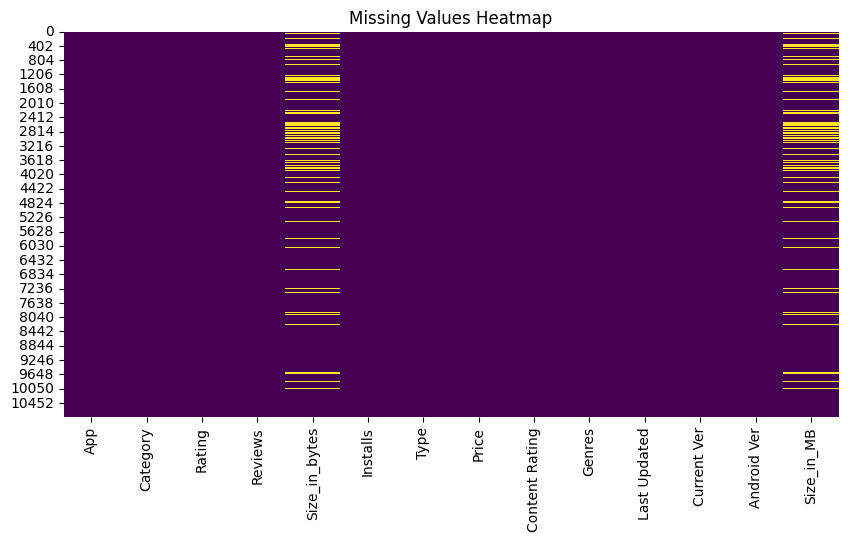

In [77]:
# plot missing value
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()




# percentage of missong value in each column

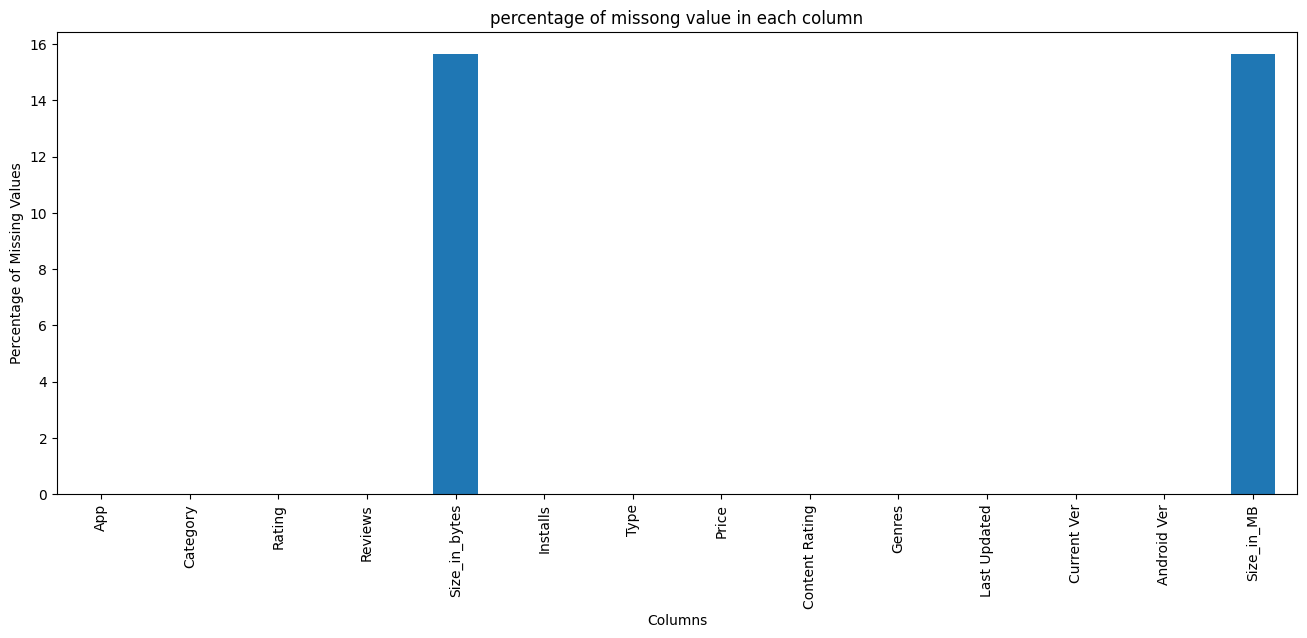

In [81]:
# make figure size
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title("percentage of missong value in each column")
plt.show()


#Distribution of Ratings

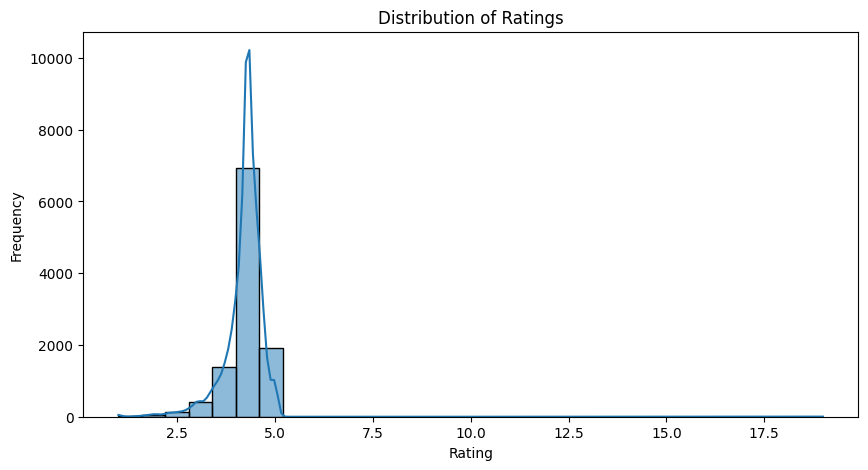

In [76]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Rating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()




# Top 10 Categories by Number of Apps

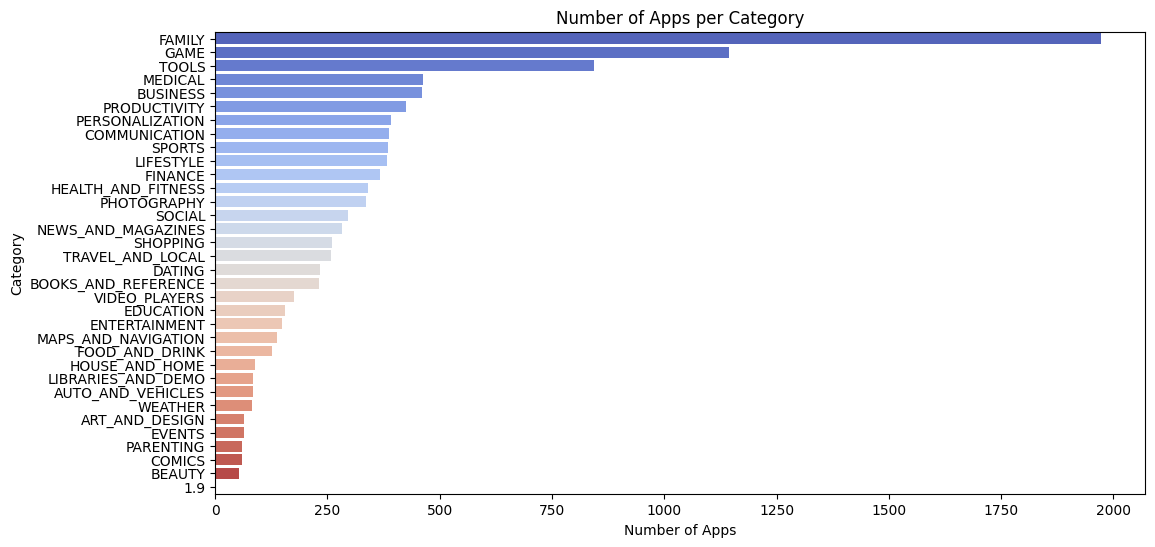

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Category'], order=df['Category'].value_counts().index, palette="coolwarm")
plt.title("Number of Apps per Category")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


# Free vs Paid Apps

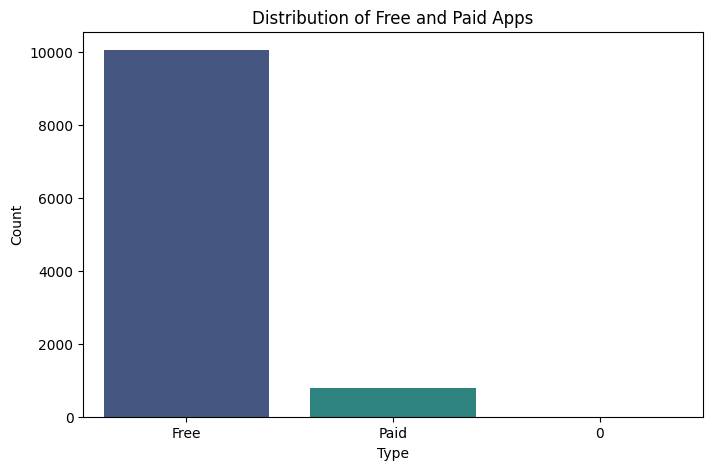

In [83]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Type'], palette="viridis")
plt.title("Distribution of Free and Paid Apps")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


Average Rating by Category

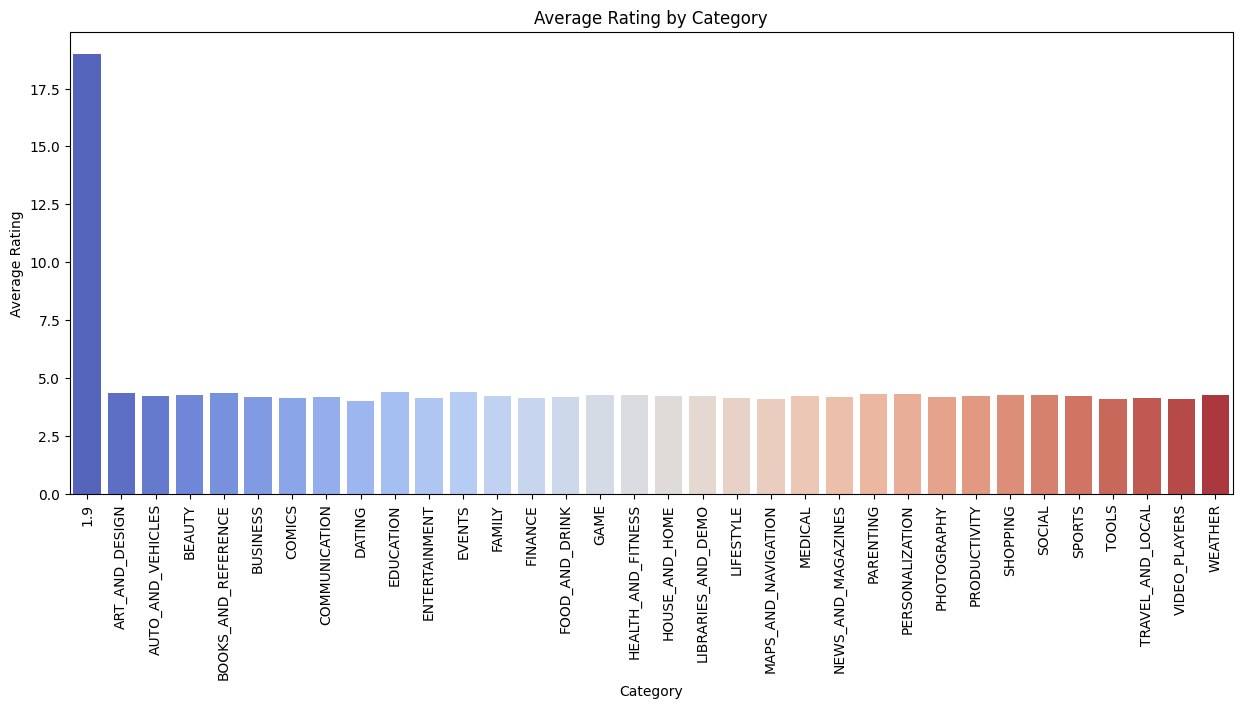

In [84]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df.groupby('Category')['Rating'].mean().index,
            y=df.groupby('Category')['Rating'].mean().values,
            palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()


# Correlation Analysis

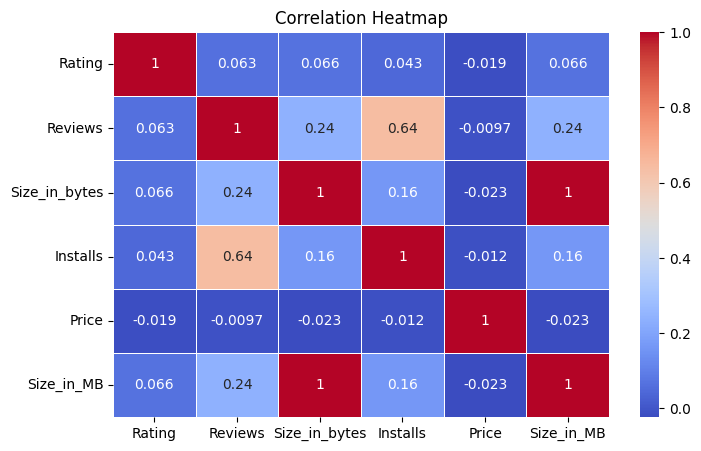

In [86]:
plt.figure(figsize=(8, 5))
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns for correlation
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Advanced Insights


# Do Paid Apps Have Higher Ratings?

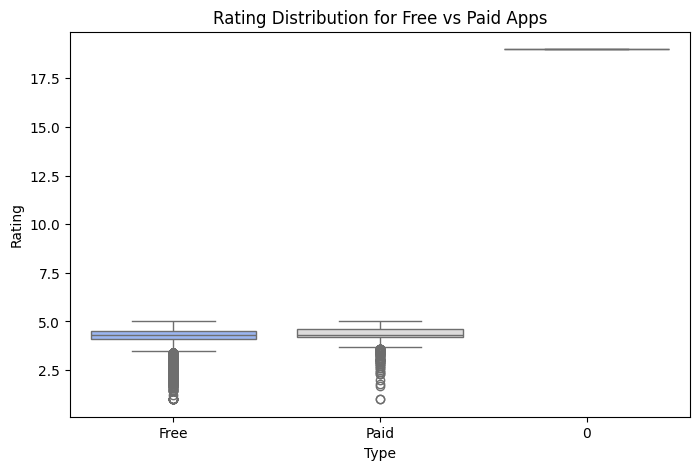

In [87]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Type'], y=df['Rating'], palette="coolwarm")
plt.title("Rating Distribution for Free vs Paid Apps")
plt.xlabel("Type")
plt.ylabel("Rating")
plt.show()


# Top Grossing Apps by Revenue (Assuming Revenue = Price * Installs)

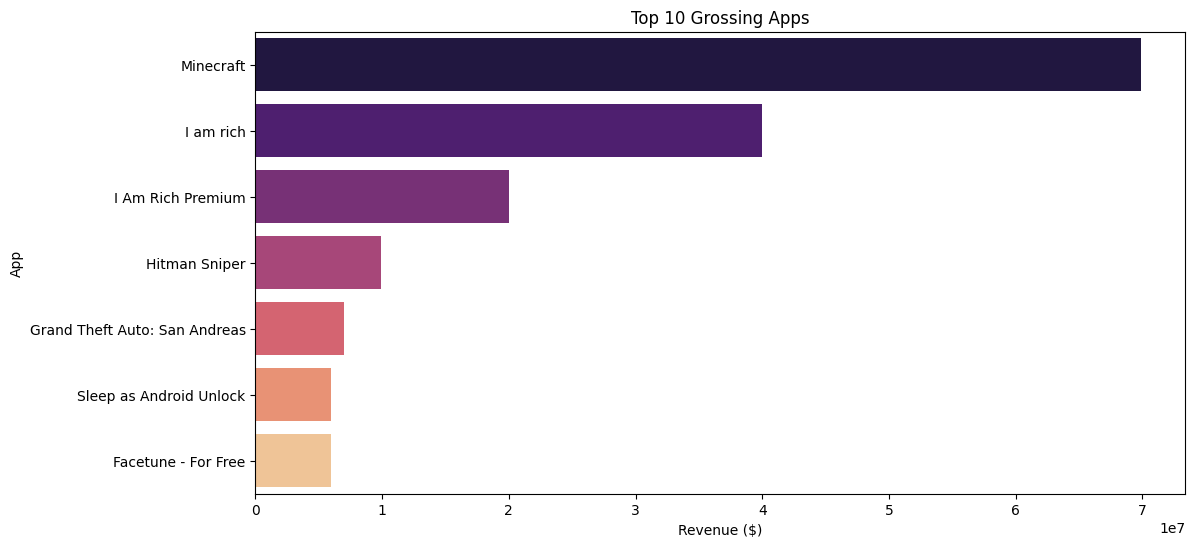

In [88]:
df['Revenue'] = df['Price'] * df['Installs']
top_revenue_apps = df[['App', 'Revenue']].sort_values(by='Revenue', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_revenue_apps['Revenue'], y=top_revenue_apps['App'], palette="magma")
plt.title("Top 10 Grossing Apps")
plt.xlabel("Revenue ($)")
plt.ylabel("App")
plt.show()


# Insights & Conclusions
* Most apps on the Play Store are free.
* Paid apps tend to have slightly higher ratings.
* Certain categories (e.g., Games, Tools, and Business) dominate the Play Store.
* The highest revenue-generating apps are mostly paid.
